In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import nippy
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [59]:
my_path = 'calibration_set/'
df_3 = pd.read_csv(my_path+'scanner_3.csv').drop(['WVN CM-1'],axis=1)
df_11 = pd.read_csv(my_path+'scanner_11.csv').drop(['WVN CM-1'],axis=1)
df_16 = pd.read_csv(my_path+'scanner_16.csv').drop(['WVN CM-1'],axis=1)
df_22 = pd.read_csv(my_path+'scanner_22.csv').drop(['WVN CM-1'],axis=1)
df_41 = pd.read_csv(my_path+'scanner_41.csv').drop(['WVN CM-1'],axis=1)
df_52 = pd.read_csv(my_path+'scanner_52.csv').drop(['WVN CM-1'],axis=1)
df_74 = pd.read_csv(my_path+'scanner_74.csv').drop(['WVN CM-1'],axis=1)

df_ref = pd.read_excel(my_path+'Reference values_3fills.xlsx')




In [60]:
df_ref.head(10)

,TLC/SUM,Starch/SUM
0,20.673077,16.826923
1,20.673077,16.826923
2,20.673077,16.826923
3,36.178862,3.658537
4,36.178862,3.658537
5,36.178862,3.658537
6,9.210526,32.894737
7,9.210526,32.894737
8,9.210526,32.894737
9,7.731959,34.536082


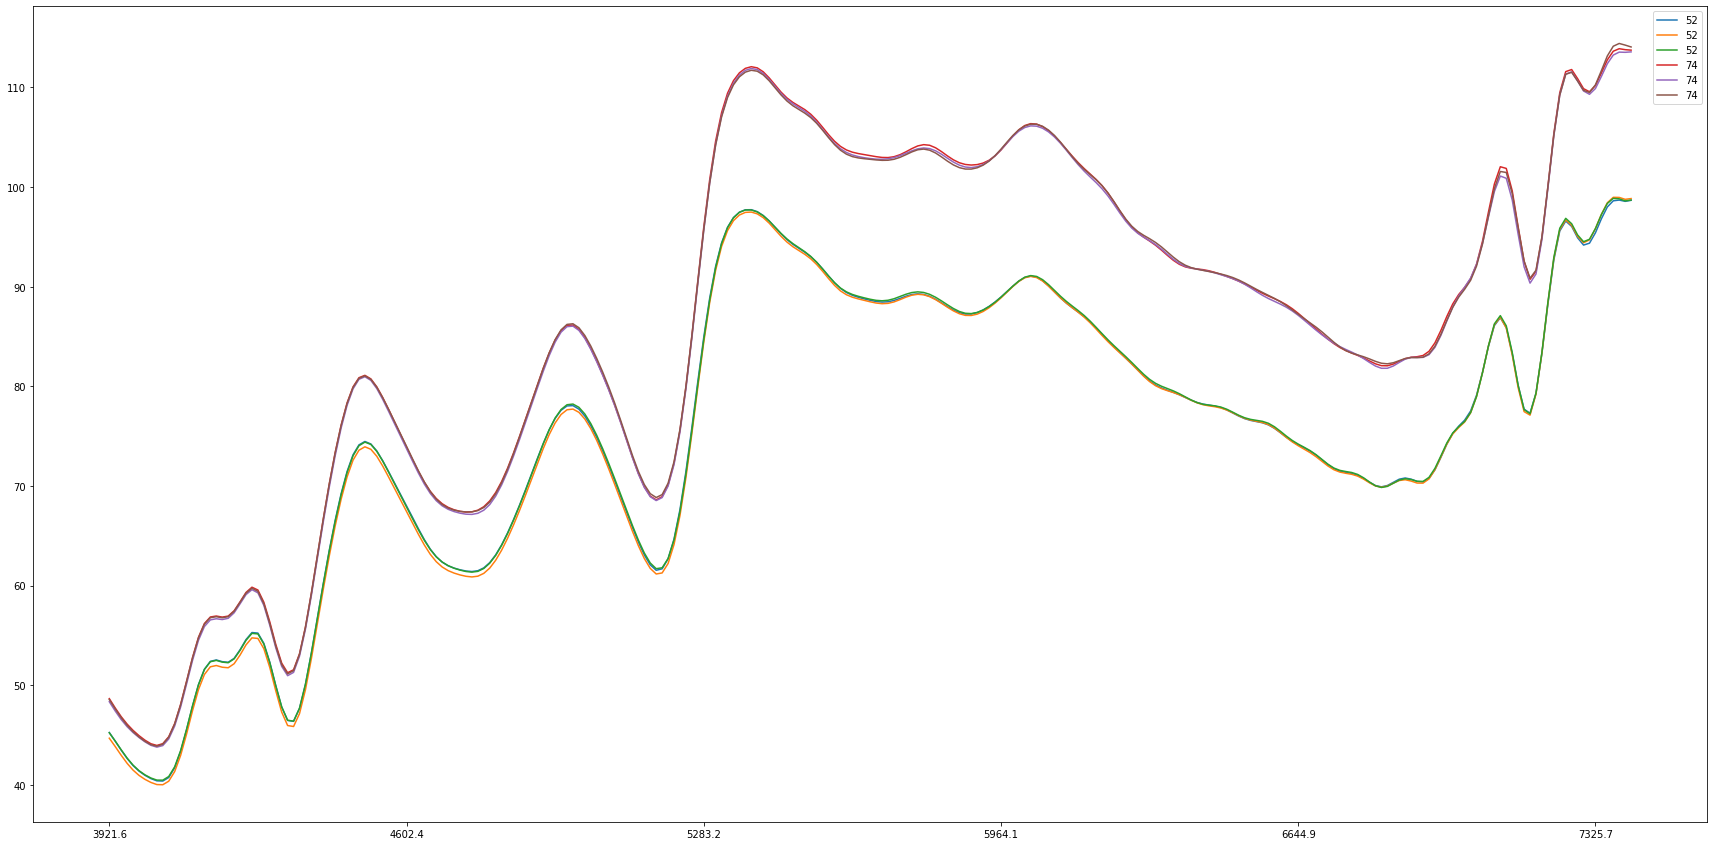

In [61]:
index = 60  # the sample number from 0 to 29
#df_3.iloc[index].plot(label='3')
#df_3.iloc[index+1].plot(label='3')
#df_3.iloc[index+2].plot(label='3')


#df_11.iloc[index].plot(label='11')
#df_11.iloc[index+1].plot(label='11')
#df_11.iloc[index+2].plot(label='11')

#df_16.iloc[index].plot(label='16')
#df_16.iloc[index+1].plot(label='16')
#df_16.iloc[index+2].plot(label='16')


#df_22.iloc[index].plot(label='22')
#df_22.iloc[index+1].plot(label='22')
#df_22.iloc[index+2].plot(label='22')

#df_41.iloc[index].plot(label='41')
#df_41.iloc[index+1].plot(label='41')
#df_41.iloc[index+2].plot(label='41')

df_52.iloc[index].plot(label='52')
df_52.iloc[index+1].plot(label='52')
df_52.iloc[index+2].plot(label='52')

df_74.iloc[index].plot(label='74')
df_74.iloc[index+1].plot(label='74')
df_74.iloc[index+2].plot(label='74')

plt.legend()

In [62]:
"""""
index = 60

ratio = (df_52.iloc[3]/df_74.iloc[4])

(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()
df_74.iloc[index].plot(label='74')
"""

'""\nindex = 60\n\nratio = (df_52.iloc[3]/df_74.iloc[4])\n\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\n(df_52.iloc[index] * (ratio * np.random.uniform(0.95,1.05))).plot()\ndf_74.iloc[index].plot(label=\'74\')\n'

In [72]:
"""""
# 1. Load configuration
pipelines = nippy.read_configuration('conf1.ini')

# 2. Load data
data = df_52.to_numpy()
wavelength = np.array(df_52.keys()).astype(float)
spectra = data.T  # Rows = wavelength, Columns = samples 

# 3. Dataset through all pipelines
datasets = nippy.nippy(wavelength, spectra, pipelines)

# 4. Export the preprocessed data (showcasing three variants)
nippy.export_pipelines_to_csv('preprocessed_data', datasets, pipelines, mkdir=True)


df_52_norm = pd.read_csv('preprocessed_data/1.csv',header = None).to_numpy().T

df_52_norm = pd.DataFrame(df_52_norm)[1:]
df_52_norm.columns = wavelength

"""




Running pipe 1:
{'NORML': {}}



In [86]:
pls = PLSRegression(n_components=4)



In [106]:
X_train,X_test,y_train,y_test = train_test_split(df_52,df_ref,test_size=0.2,shuffle=False)

In [107]:
pls.fit(X_train,y_train)

PLSRegression(n_components=4)

In [108]:
pls.score(X_test,y_test)

0.7670593512979138